In [13]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import seaborn as sns
from scipy.stats import mannwhitneyu, ks_2samp
plt.style.use("ggplot")

In [14]:
ds_open = xr.open_dataset("../data/open/fields_biogem_3d.nc")
ds_close = xr.open_dataset("../data/close/fields_biogem_3d.nc")

In [15]:
zt_open = ds_open["zt"].to_numpy()
lat_open = ds_open["lat"].to_numpy()
rho_open = ds_open["phys_ocn_rho"].isel(time=0).mean(dim="lon").to_numpy()

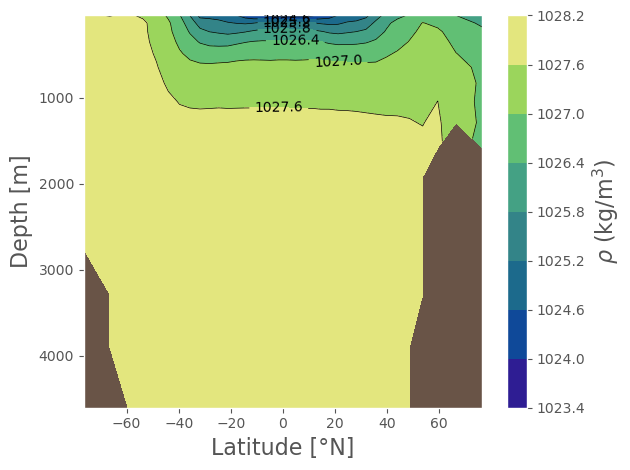

In [16]:
plt.fill_between(lat_open, zt_open.min(), zt_open.max(), color='#695447')
contour_filled = plt.contourf(lat_open, zt_open, rho_open, 
                              #levels=colorbar_levels, 
                              cmap=cm.haline)
contour_lines = plt.contour(lat_open, zt_open, rho_open, 
                            #levels=colorbar_levels,
                            colors='k', linewidths=0.5)

plt.xlabel("Latitude [°N]", fontsize=16)
plt.ylabel("Depth [m]", fontsize=16)
cbar = plt.colorbar(contour_filled)
cbar.set_label(r"$\rho$ (kg/m$^3$)", fontsize=16)
plt.clabel(contour_lines, inline=True, fontsize=10, fmt='%1.1f')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../figs/fig2a.png", dpi=600)

In [17]:
zt_close = ds_close["zt"].to_numpy()
lat_close = ds_close["lat"].to_numpy()
rho_close = ds_close["phys_ocn_rho"].isel(time=0).mean(dim="lon").to_numpy()

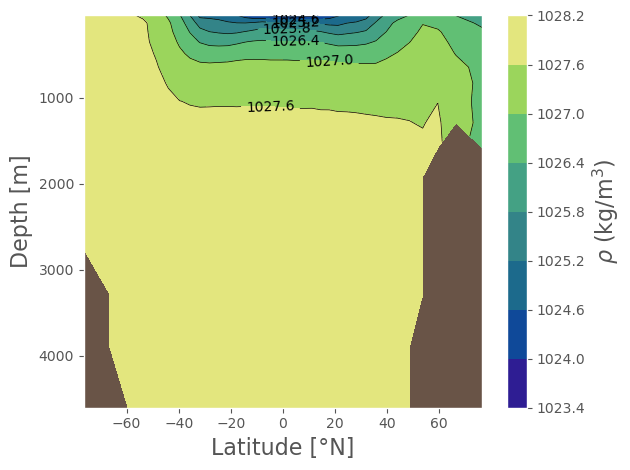

In [18]:
plt.fill_between(lat_close, zt_close.min(), zt_close.max(), color='#695447')
contour_filled = plt.contourf(lat_close, zt_close, rho_close, 
                              #levels=colorbar_levels, 
                              cmap=cm.haline)
contour_lines = plt.contour(lat_close, zt_close, rho_close, 
                            #levels=colorbar_levels,
                            colors='k', linewidths=0.5)

plt.xlabel("Latitude [°N]", fontsize=16)
plt.ylabel("Depth [m]", fontsize=16)
cbar = plt.colorbar(contour_filled)
cbar.set_label(r"$\rho$ (kg/m$^3$)", fontsize=16)
plt.clabel(contour_lines, inline=True, fontsize=10, fmt='%1.1f')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../figs/fig2b.png", dpi=600)

In [19]:
open_rho = rho_open.flatten()
close_rho = rho_close.flatten()

In [20]:
open_rho = open_rho[~(np.isnan(open_rho))]
close_rho = close_rho[~(np.isnan(close_rho))]

/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

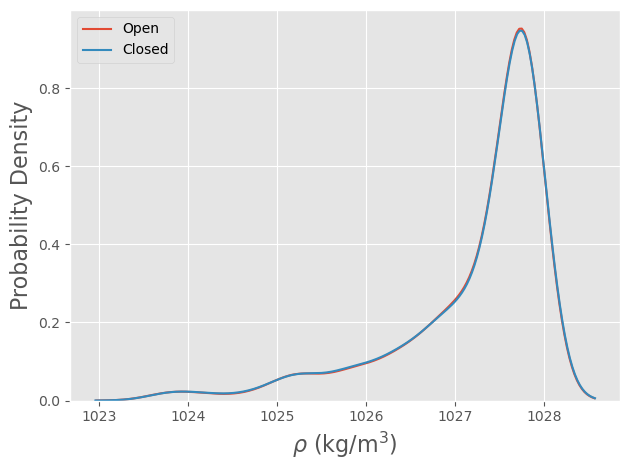

In [27]:
sns.kdeplot(open_rho, label='Open', fill=False);
sns.kdeplot(close_rho, label='Closed', fill=False);
plt.xlabel(r"$\rho$ (kg/m$^3$)", fontsize=16);
plt.ylabel('Probability Density', fontsize=16);
plt.legend();
plt.tight_layout();
plt.savefig("../figs/fig2e.png", dpi=600);

/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ronggolawe/anaconda3/envs/new/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


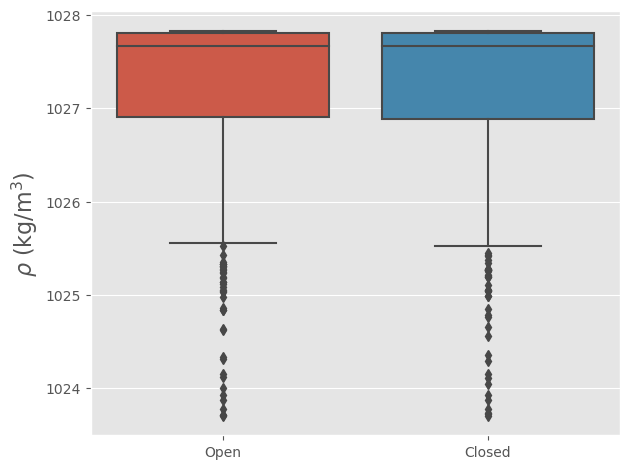

In [25]:
combined_data = np.concatenate([open_rho, close_rho])
grouping_array = np.concatenate([['Open'] * len(open_rho), ['Closed'] * len(close_rho)])
sns.boxplot(x=grouping_array, y=combined_data);
plt.ylabel(r"$\rho$ (kg/m$^3$)", fontsize=16);
plt.tight_layout();
plt.savefig("../figs/fig2d.png", dpi=600);

In [23]:
# Mann-Whitney U test
statistic_mw, p_value_mw = mannwhitneyu(open_rho, close_rho)
print(f'Mann-Whitney U test statistic: {round(statistic_mw, 3)}')
print(f'Mann-Whitney U test p-value: {round(p_value_mw, 3)}')

# Interpretation of Mann-Whitney U test
if p_value_mw < 0.05:
    print('The Mann-Whitney U test suggests a significant difference between the distributions of the two arrays.')
else:
    print('The Mann-Whitney U test does not provide enough evidence to reject the null hypothesis of no difference between the distributions.')

# Kolmogorov-Smirnov (KS) test
statistic_ks, p_value_ks = ks_2samp(open_rho, close_rho)
print(f'KS test statistic: {round(statistic_ks, 3)}')
print(f'KS test p-value: {round(p_value_ks, 3)}')

# Interpretation of KS test
if p_value_ks < 0.05:
    print('The KS test suggests a significant difference between the distributions of the two arrays.')
else:
    print('The KS test does not provide enough evidence to reject the null hypothesis of no difference between the distributions.')

Mann-Whitney U test statistic: 149848.5
Mann-Whitney U test p-value: 0.565
The Mann-Whitney U test does not provide enough evidence to reject the null hypothesis of no difference between the distributions.
KS test statistic: 0.078
KS test p-value: 0.071
The KS test does not provide enough evidence to reject the null hypothesis of no difference between the distributions.


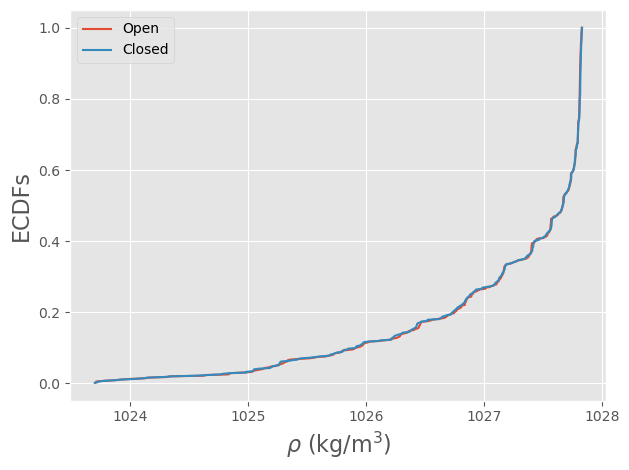

In [26]:
# Calculate ECDFs
def ecdf(data):
    sorted_data = np.sort(data)
    n = len(data)
    y = np.arange(1, n + 1) / n
    return sorted_data, y

x1, y1 = ecdf(open_rho)
x2, y2 = ecdf(close_rho)

# Plot ECDFs
plt.plot(x1, y1, label='Open')
plt.plot(x2, y2, label='Closed')
plt.xlabel(r"$\rho$ (kg/m$^3$)", fontsize=16)
plt.ylabel('ECDFs', fontsize=16)
plt.legend()
plt.tight_layout();
plt.savefig("../figs/fig2f.png", dpi=600);